# Object-Oriented Programming for IR Spectroscopy Analysis

This tutorial introduces object-oriented programming (OOP) concepts through the practical application of analyzing IR spectroscopy data. By the end of this tutorial, you will understand how to:

1. Create classes to represent IR spectra
2. Add metadata to spectra (temperature, gas flow, etc.)
3. Implement common analysis techniques as class methods
4. Visualize spectral data and analysis results

## Prerequisites
- Basic understanding of Python syntax
- Familiarity with Jupyter notebooks
- Understanding of IR spectroscopy concepts

## 1. Introduction to Object-Oriented Programming

Object-oriented programming is a programming paradigm based on the concept of "objects", which can contain data and code. The data is in the form of attributes, and the code is in the form of methods.

### Key OOP concepts:
- **Classes**: Templates for creating objects
- **Objects**: Instances of classes
- **Attributes**: Data stored in an object
- **Methods**: Functions that can access and modify an object's attributes
- **Inheritance**: Creating new classes based on existing classes

Let's first import the libraries we'll need for this tutorial:

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy import signal
from glob import glob

# Set plot style
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

## Import DRIFTS_package from GitHub

In [ ]:
import DRIFTS_package as ir

In [ ]:
ir.read_logfile(setup = 'DeNOx', logfile_path = 'IR spectra and logfile')
ir.parse_spectra('IR spectra and logfile')

Converting logfile date and time to pandas DateTime...
Logfile read successfully.

Looking for raw_spectra.csv...
Found raw_spectra.csv; spectra loaded successfully. If reloading is required, specify delete_previous = True or delete the raw_spectra.csv file in the folder.


,4497.331800,4495.903622,4494.475444,4493.047267,4491.619089,4490.190911,4488.762733,4487.334556,4485.906378,4484.478200,...,612.688260,611.260082,609.831904,608.403727,606.975549,605.547371,604.119193,602.691016,601.262838,599.834660
250429_Ra01_COox_008_0000,0.532281,0.530566,0.531201,0.534487,0.539484,0.544233,0.546523,0.545851,0.544133,0.543515,...,1.668240,1.685064,1.691242,1.684324,1.670841,1.651963,1.629901,1.609789,1.593403,1.582642
250429_Ra01_COox_008_0001,0.542415,0.539664,0.538933,0.540762,0.542851,0.543759,0.543861,0.543042,0.540653,0.537660,...,1.655820,1.664555,1.668294,1.672006,1.672536,1.667763,1.664475,1.668262,1.669295,1.653814
250429_Ra01_COox_008_0002,0.550632,0.549775,0.547869,0.545234,0.543859,0.544683,0.546248,0.546835,0.546422,0.545773,...,1.675179,1.668638,1.660363,1.659421,1.669216,1.683653,1.688022,1.671902,1.645383,1.621601
250429_Ra01_COox_008_0003,0.551822,0.551092,0.552229,0.554061,0.555201,0.554937,0.553026,0.550213,0.548169,0.547986,...,1.692067,1.691129,1.678723,1.667694,1.670156,1.677172,1.673828,1.666581,1.672762,1.694129
250429_Ra01_COox_008_0004,0.552899,0.551386,0.549586,0.548229,0.548178,0.549552,0.550931,0.550417,0.548422,0.547692,...,1.662734,1.658407,1.642952,1.635990,1.648917,1.669049,1.674048,1.665298,1.662416,1.668541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250429_Ra01_COox_008_0695,0.395710,0.394621,0.393297,0.392785,0.393533,0.394622,0.394801,0.394167,0.393945,0.394910,...,1.689264,1.684579,1.683130,1.694702,1.714891,1.728038,1.727344,1.721349,1.719724,1.722562
250429_Ra01_COox_008_0696,0.398870,0.399230,0.400763,0.401826,0.401420,0.400305,0.399318,0.397701,0.394917,0.392850,...,1.766893,1.781773,1.796314,1.803900,1.793213,1.767134,1.740885,1.719277,1.701188,1.690796
250429_Ra01_COox_008_0697,0.392764,0.395205,0.396114,0.395599,0.395254,0.396222,0.397775,0.397910,0.395661,0.392624,...,1.699411,1.685090,1.686977,1.696966,1.704857,1.705289,1.695921,1.682571,1.680338,1.693310
250429_Ra01_COox_008_0698,0.398308,0.397968,0.397468,0.397705,0.399145,0.400990,0.401795,0.401076,0.400042,0.400126,...,1.820245,1.793334,1.749416,1.722499,1.730311,1.766084,1.808943,1.830163,1.826270,1.817716


In [ ]:
filepath = 'IR spectra and logfile'

merged_data = ir.merge_spectra_logfile(filepath, filepath)
merged_data

Converting logfile date and time to pandas DateTime...
Logfile read successfully.

Looking for raw_spectra.csv...
Found raw_spectra.csv; spectra loaded successfully. If reloading is required, specify delete_previous = True or delete the raw_spectra.csv file in the folder.
Using first logfile time (2025-04-29 09:58:30) as start time of spectra.
Merging spectra with logfile...
Removed spectra after end of logfile. You can delete spectra from 0618 onwards
Spectra and logfile merged successfully.



,4497.3318,4495.903622,4494.475444,4493.047267,4491.619089,4490.190911,4488.762733,4487.334556,4485.906378,4484.4782,...,Propene_flow,O2_sp,O2_flow,Target_Oven_sp,Oven_ramp,Oven_temp,Oven_temp_internal,Oven_percent,Oven_actual_sp,Number
DateTime,,,,,,,,,,,,,,,,,,,,,
2025-04-29 09:58:30,0.532281,0.530566,0.531201,0.534487,0.539484,0.544233,0.546523,0.545851,0.544133,0.543515,...,-0.003,0.0,0.154,15.0,10.0,23.2,0.0,0.0,15.0,0
2025-04-29 09:59:30,0.542415,0.539664,0.538933,0.540762,0.542851,0.543759,0.543861,0.543042,0.540653,0.537660,...,-0.014,0.0,0.181,400.0,10.0,23.2,0.0,1.2,24.5,1
2025-04-29 10:00:30,0.550632,0.549775,0.547869,0.545234,0.543859,0.544683,0.546248,0.546835,0.546422,0.545773,...,-0.019,0.0,0.170,400.0,10.0,28.0,0.0,21.9,34.5,2
2025-04-29 10:01:30,0.551822,0.551092,0.552229,0.554061,0.555201,0.554937,0.553026,0.550213,0.548169,0.547986,...,-0.021,0.0,0.161,400.0,10.0,43.3,0.0,20.9,44.5,3
2025-04-29 10:02:30,0.552899,0.551386,0.549586,0.548229,0.548178,0.549552,0.550931,0.550417,0.548422,0.547692,...,-0.007,0.0,0.162,400.0,10.0,52.9,0.0,23.2,54.5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-29 20:11:30,0.395790,0.396807,0.398169,0.399255,0.399722,0.398957,0.396715,0.394234,0.393225,0.394094,...,-0.005,0.0,0.258,15.0,2.0,25.6,0.0,0.0,15.0,613
2025-04-29 20:12:30,0.397300,0.398041,0.399241,0.398556,0.395918,0.393207,0.391685,0.391313,0.392166,0.394705,...,-0.010,0.0,0.252,15.0,2.0,25.6,0.0,0.0,15.0,614
2025-04-29 20:13:30,0.394663,0.396136,0.397528,0.398094,0.397870,0.397263,0.395980,0.393648,0.391260,0.390601,...,-0.008,0.0,0.250,15.0,2.0,25.5,0.0,0.0,15.0,615


Combining spectral data and logfile data in one dataframe might work, but is not very convenient. When performing a background correction, for example, the logfile data has to be temporarily removed before any subtracting operations can be performed.

For this, object-oriented programming (OOP) is a possible solution. Creating a class can help store all information in one object, or 'class'. Additionally, operations such as background corrections, baseline subtractions, and peak area analysis can be integrated in the class as well.

## 2. Creating a Spectrum Class

Let's create a basic class to represent an IR spectrum. This will be our foundation for the rest of the tutorial.

In [ ]:
class IRSpectrum:
    """A class to represent an IR spectrum."""
    
    def __init__(self, wavenumbers=None, absorbances=None, filepath=None):
        """Initialize the IRSpectrum object.
        
        Args:
            wavenumbers (array-like): The wavenumbers (x-axis) of the spectrum
            absorbances (array-like): The absorbances (y-axis) of the spectrum
            filepath (str): Path to a file containing spectrum data
        """
        # Initialize basic data
        self.wavenumbers = wavenumbers
        self.absorbances = absorbances
        self.metadata = {}
        
        # Load data from file if provided
        if filepath is not None:
            self._load_from_file(filepath)
    
    def _load_from_file(self, filepath):
        """Load spectrum data from a file.
        
        This is a simple implementation. In a real-world scenario,
        you'd want more robust file handling for different formats.
        """
        # Extract filename as a basic piece of metadata
        self.metadata['filename'] = os.path.basename(filepath)
        
        # Check if file exists
        if not os.path.exists(filepath):
            raise FileNotFoundError(f"File not found: {filepath}")
        
        # For this tutorial, we'll implement a simple parser for .dx files
        # which are common for IR spectroscopy
        if filepath.lower().endswith('.dx'):
            # Basic implementation for parsing .dx files
            # This would need to be adapted for real .dx files
            try:
                with open(filepath, 'r') as f:
                    lines = f.readlines()
                
                # Simple parsing logic - would need customization for real files
                data_section = False
                x_data = []
                y_data = []
                
                for line in lines:
                    line = line.strip()
                    
                    # Skip empty lines and comments
                    if not line or line.startswith('#'):
                        continue
                    
                    # Look for data section
                    if line.startswith('##XYDATA'):
                        data_section = True
                        continue
                    
                    # Parse metadata (simplified)
                    if '=' in line and not data_section:
                        key, value = line.split('=', 1)
                        key = key.strip('# ')
                        self.metadata[key] = value.strip()
                    
                    # Parse data points
                    if data_section and not line.startswith('##'):
                        try:
                            values = line.split()
                            if len(values) >= 2:
                                x_data.append(float(values[0]))
                                y_data.append(float(values[1]))
                        except ValueError:
                            # Skip lines that can't be parsed as numbers
                            pass
                
                self.wavenumbers = np.array(x_data)
                self.absorbances = np.array(y_data)
                
            except Exception as e:
                print(f"Error loading file {filepath}: {e}")
                raise
        else:
            raise ValueError(f"Unsupported file format: {filepath}")
    
    def add_metadata(self, key, value):
        """Add metadata to the spectrum.
        
        Args:
            key (str): The metadata key
            value: The metadata value
        """
        self.metadata[key] = value
    
    def plot(self, title=None, xlim=None, ylim=None, **kwargs):
        """Plot the IR spectrum.
        
        Args:
            title (str, optional): The plot title
            xlim (tuple, optional): The x-axis limits (min, max)
            ylim (tuple, optional): The y-axis limits (min, max)
            **kwargs: Additional keyword arguments to pass to plt.plot()
        """
        if self.wavenumbers is None or self.absorbances is None:
            raise ValueError("No data to plot")
        
        plt.figure(figsize=(12, 6))
        plt.plot(self.wavenumbers, self.absorbances, **kwargs)
        
        # Set plot parameters
        if title:
            plt.title(title)
        else:
            # Use filename from metadata if available
            if 'filename' in self.metadata:
                plt.title(f"IR Spectrum: {self.metadata['filename']}")
            else:
                plt.title("IR Spectrum")
        
        plt.xlabel('Wavenumber (cm⁻¹)')
        plt.ylabel('Absorbance')
        
        # Set axis limits if provided
        if xlim:
            plt.xlim(xlim)
        else:
            # IR spectra conventionally have wavenumber axis decreasing
            plt.xlim(max(self.wavenumbers), min(self.wavenumbers))
        
        if ylim:
            plt.ylim(ylim)
        
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    
    def __str__(self):
        """Return a string representation of the spectrum."""
        if self.wavenumbers is None or self.absorbances is None:
            return "Empty IR Spectrum"
        
        metadata_str = "\n".join([f"{k}: {v}" for k, v in self.metadata.items()])
        return f"IR Spectrum with {len(self.wavenumbers)} data points\nWavenumber range: {min(self.wavenumbers)}-{max(self.wavenumbers)} cm⁻¹\n\nMetadata:\n{metadata_str}"
    
    def __repr__(self):
        return self.__str__()

## 3. Creating a Test Spectrum

Before we load real data, let's create a test spectrum to see how our class works.

In [ ]:
# Create a synthetic spectrum for testing
wavenumbers = np.linspace(4000, 600, 1000)  # Common IR range

# Create a synthetic absorbance spectrum with some peaks
absorbances = np.zeros_like(wavenumbers)

# Add some Gaussian peaks at typical IR frequencies
peaks = {
    3500: 0.8,  # O-H stretch
    2950: 0.6,  # C-H stretch
    1700: 1.0,  # C=O stretch
    1450: 0.5,  # C-H bend
    1100: 0.7,  # C-O stretch
    800: 0.4    # C-H out-of-plane bend
}

for peak_pos, peak_height in peaks.items():
    # Add a Gaussian peak
    absorbances += peak_height * np.exp(-(wavenumbers - peak_pos)**2 / (2 * 20**2))

# Add some noise
np.random.seed(42)  # For reproducibility
noise = np.random.normal(0, 0.02, size=len(wavenumbers))
absorbances += noise

# Create our test spectrum
test_spectrum = IRSpectrum(wavenumbers, absorbances)

# Add some metadata
test_spectrum.add_metadata('temperature', 25)
test_spectrum.add_metadata('sample', 'Synthetic Test')
test_spectrum.add_metadata('date', '2025-05-08')

# Display information about the spectrum
print(test_spectrum)

IR Spectrum with 1000 data points
Wavenumber range: 600.0-4000.0 cm⁻¹

Metadata:
temperature: 25
sample: Synthetic Test
date: 2025-05-08


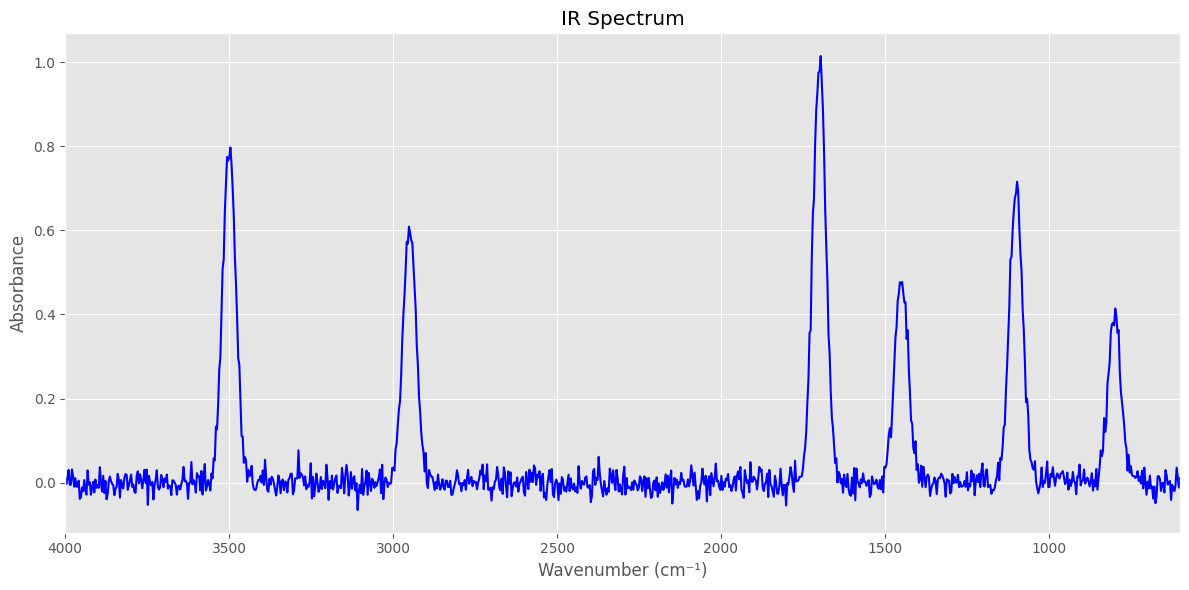

In [ ]:
# Plot the test spectrum
test_spectrum.plot(color='blue', linewidth=1.5)

## 4. Loading Real IR Spectra

Now, let's load some real IR spectroscopy data from the example_data folder.

In [ ]:
# Find all .dx files in the example_data/data directory
data_dir = 'IR spectrum'
dx_files = sorted(glob(os.path.join(data_dir, '*.dx')))

print(f"Found {len(dx_files)} .dx files in {data_dir}")

# Show the first few files
for file in dx_files[:5]:
    print(os.path.basename(file))

Found 1 .dx files in IR spectrum
IR spectrum 1.dx


In [ ]:
spectrum_DF = ir.parse_spectra(data_dir, invert_xaxis = False, delete_previous = True)

Deleted previous raw_spectra.csv file.
Looking for raw_spectra.csv...
No csv file in data folder. Looking in the current folder...
No csv found. Loading spectra from dx files...
Exporting spectra to csv.
Spectra parsed successfully.



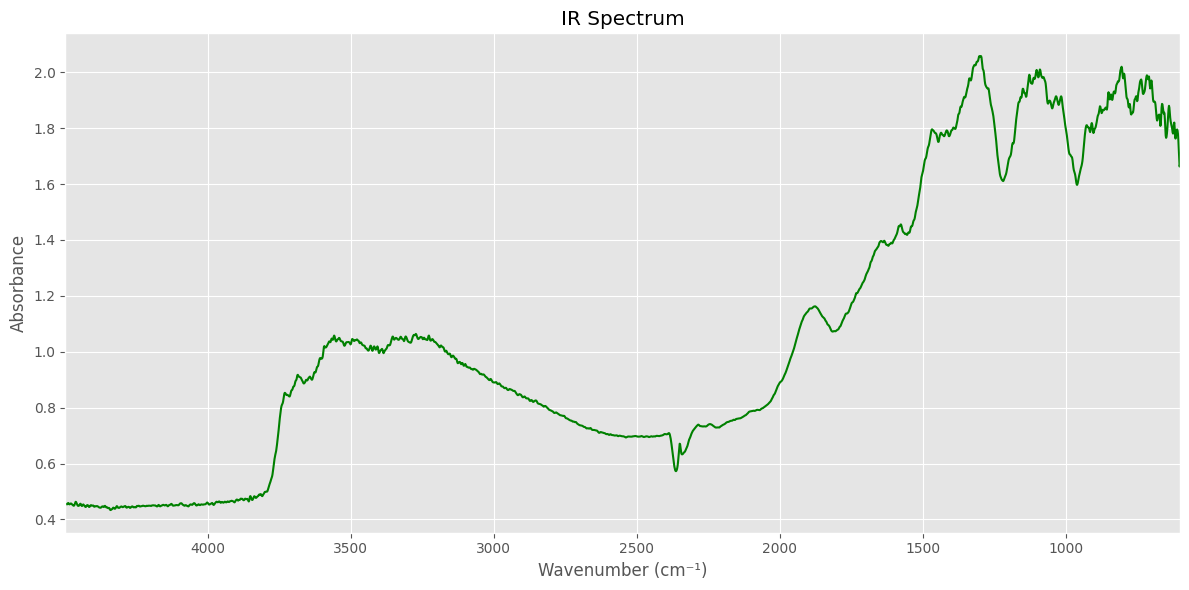

In [ ]:
spectrum_object = IRSpectrum(wavenumbers = spectrum_DF.columns, absorbances = spectrum_DF.values[0])
spectrum_object.plot(title = 'IR Spectrum', color = 'green', linewidth = 1.5)

## 4B. Loading all real IR spectra into IRSpectrum objects

In [ ]:
# Find all .dx files in the example_data/data directory
data_dir = 'IR spectra and logfile'
dx_files = sorted(glob(os.path.join(data_dir, '*.dx')))

print(f"Found {len(dx_files)} .dx files in {data_dir}")

# Show the first few files
for file in dx_files[:5]:
    print(os.path.basename(file))

Found 700 .dx files in IR spectra and logfile
250429_Ra01_COox_008_0000.dx
250429_Ra01_COox_008_0001.dx
250429_Ra01_COox_008_0002.dx
250429_Ra01_COox_008_0003.dx
250429_Ra01_COox_008_0004.dx


In [ ]:
# Parse all spectra in the folder
spectra_DF = ir.parse_spectra(data_dir, invert_xaxis = True, delete_previous = False)
spectra_DF.head()

Looking for raw_spectra.csv...
Found raw_spectra.csv; spectra loaded successfully. If reloading is required, specify delete_previous = True or delete the raw_spectra.csv file in the folder.


,4497.331800,4495.903622,4494.475444,4493.047267,4491.619089,4490.190911,4488.762733,4487.334556,4485.906378,4484.478200,...,612.688260,611.260082,609.831904,608.403727,606.975549,605.547371,604.119193,602.691016,601.262838,599.834660
250429_Ra01_COox_008_0000,0.532281,0.530566,0.531201,0.534487,0.539484,0.544233,0.546523,0.545851,0.544133,0.543515,...,1.668240,1.685064,1.691242,1.684324,1.670841,1.651963,1.629901,1.609789,1.593403,1.582642
250429_Ra01_COox_008_0001,0.542415,0.539664,0.538933,0.540762,0.542851,0.543759,0.543861,0.543042,0.540653,0.537660,...,1.655820,1.664555,1.668294,1.672006,1.672536,1.667763,1.664475,1.668262,1.669295,1.653814
250429_Ra01_COox_008_0002,0.550632,0.549775,0.547869,0.545234,0.543859,0.544683,0.546248,0.546835,0.546422,0.545773,...,1.675179,1.668638,1.660363,1.659421,1.669216,1.683653,1.688022,1.671902,1.645383,1.621601
250429_Ra01_COox_008_0003,0.551822,0.551092,0.552229,0.554061,0.555201,0.554937,0.553026,0.550213,0.548169,0.547986,...,1.692067,1.691129,1.678723,1.667694,1.670156,1.677172,1.673828,1.666581,1.672762,1.694129
250429_Ra01_COox_008_0004,0.552899,0.551386,0.549586,0.548229,0.548178,0.549552,0.550931,0.550417,0.548422,0.547692,...,1.662734,1.658407,1.642952,1.635990,1.648917,1.669049,1.674048,1.665298,1.662416,1.668541


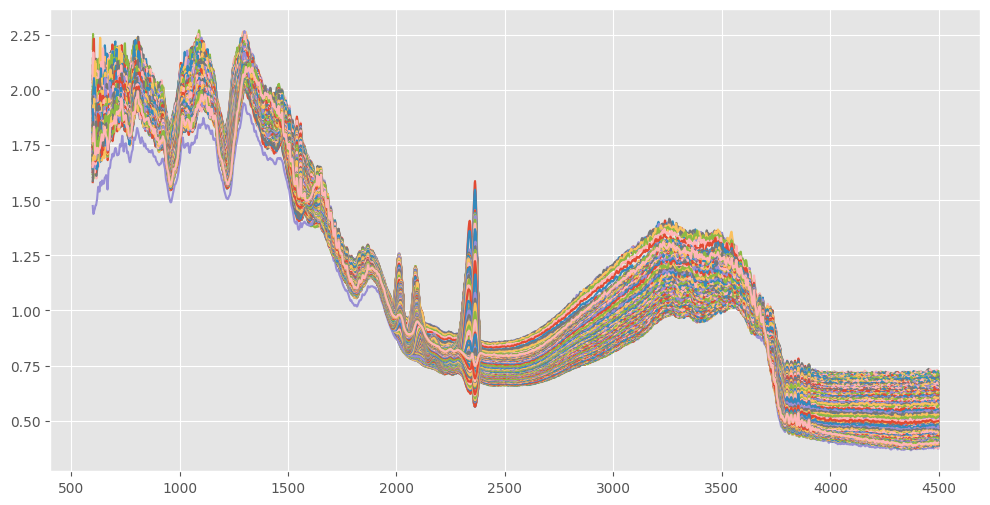

In [ ]:
# Add all spectra to a list of IRSpectrum objects
spectra_list = []

for row in spectra_DF.iterrows():
    spectrum = IRSpectrum(wavenumbers = spectra_DF.columns, absorbances = row[1].values)
    spectrum.add_metadata('name', row[0])

    spectra_list.append(spectrum)

fig, ax = plt.subplots(figsize=(12, 6))
for n in spectra_list:
    ax.plot(n.wavenumbers, n.absorbances, label = n.metadata['name'], linewidth = 1.5)

## 5. Enhanced Spectrum Class with Analysis Methods

Now, let's extend our `IRSpectrum` class with more advanced functionality:

In [ ]:
class EnhancedIRSpectrum(IRSpectrum):
    """An enhanced version of the IRSpectrum class with additional analysis capabilities."""
    
    def __init__(self, wavenumbers=None, absorbances=None, filepath=None):
        # Call the parent class's __init__ method
        super().__init__(wavenumbers, absorbances, filepath)
        
        # Initialize additional attributes
        self.background = None
        self.baseline_corrected = False
    
    def set_background(self, background_spectrum):
        """Set a background spectrum for subtraction.
        
        Args:
            background_spectrum (IRSpectrum): The background spectrum to subtract
        """
        if not isinstance(background_spectrum, IRSpectrum):
            raise TypeError("Background must be an IRSpectrum object")
        
        self.background = background_spectrum
    
    def subtract_background(self):
        """Subtract the background spectrum from this spectrum.
        
        Returns:
            EnhancedIRSpectrum: A new spectrum with background subtracted
        """
        if self.background is None:
            raise ValueError("No background spectrum set")
        
        # Ensure the wavenumbers match
        if not np.array_equal(self.wavenumbers, self.background.wavenumbers):
            # In a real implementation, you might interpolate here
            raise ValueError("Wavenumber ranges don't match between spectrum and background")
        
        # Create a new spectrum with the background subtracted
        subtracted_abs = self.absorbances - self.background.absorbances
        result = EnhancedIRSpectrum(self.wavenumbers, subtracted_abs)
        
        # Copy metadata and add information about background subtraction
        result.metadata = self.metadata.copy()
        result.add_metadata('background_subtracted', True)
        if 'filename' in self.background.metadata:
            result.add_metadata('background_file', self.background.metadata['filename'])
        
        return result
    
    def correct_baseline(self, polynomial_order=3):
        """Perform polynomial baseline correction.
        
        Args:
            polynomial_order (int): Order of the polynomial for baseline fitting
            
        Returns:
            EnhancedIRSpectrum: A new spectrum with baseline corrected
        """
        # Fit a polynomial to the baseline
        coeffs = np.polyfit(self.wavenumbers, self.absorbances, polynomial_order)
        baseline = np.polyval(coeffs, self.wavenumbers)
        
        # Subtract the baseline
        corrected_abs = self.absorbances - baseline
        
        # Create a new spectrum with the corrected data
        result = EnhancedIRSpectrum(self.wavenumbers, corrected_abs)
        result.metadata = self.metadata.copy()
        result.add_metadata('baseline_corrected', True)
        result.add_metadata('baseline_polynomial_order', polynomial_order)
        
        return result
    
    def find_peaks(self, height=None, threshold=0.05, min_distance=10):
        """Find peaks in the spectrum.
        
        Args:
            height (float, optional): Minimum peak height
            threshold (float): Required vertical distance to adjacent points
            min_distance (int): Minimum distance between peaks (in data points)
            
        Returns:
            tuple: (peak_wavenumbers, peak_absorbances)
        """
        # Find peaks using scipy.signal
        peaks, _ = signal.find_peaks(
            self.absorbances, 
            height=height,
            threshold=threshold,
            distance=min_distance
        )
        
        # Get the wavenumbers and absorbances at the peak positions
        peak_wavenumbers = self.wavenumbers[peaks]
        peak_absorbances = self.absorbances[peaks]
        
        return peak_wavenumbers, peak_absorbances
    
    def plot_with_peaks(self, **kwargs):
        """Plot the spectrum with detected peaks.
        
        Args:
            **kwargs: Arguments to pass to find_peaks()
        """
        peak_wavenumbers, peak_absorbances = self.find_peaks(**kwargs)
        
        plt.figure(figsize=(12, 6))
        
        # Plot the spectrum
        plt.plot(self.wavenumbers, self.absorbances, label='Spectrum')
        
        # Plot the peaks
        plt.scatter(peak_wavenumbers, peak_absorbances, color='red', marker='o', label='Peaks')
        
        # Label the peaks with their wavenumber
        for i, (wn, abs) in enumerate(zip(peak_wavenumbers, peak_absorbances)):
            plt.annotate(f'{wn:.0f}', (wn, abs), textcoords="offset points", 
                        xytext=(0,10), ha='center')
        
        # Set plot parameters
        if 'filename' in self.metadata:
            plt.title(f"IR Spectrum with Peaks: {self.metadata['filename']}")
        else:
            plt.title("IR Spectrum with Peaks")
        
        plt.xlabel('Wavenumber (cm⁻¹)')
        plt.ylabel('Absorbance')
        plt.xlim(max(self.wavenumbers), min(self.wavenumbers))  # Reverse x-axis
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        # Return the peaks data
        return list(zip(peak_wavenumbers, peak_absorbances))
    
    def get_peak_intensity(self, wavenumber, tolerance=10):
        """Get the intensity at a specific wavenumber.
        
        Args:
            wavenumber (float): The wavenumber to check
            tolerance (float): Tolerance for finding the wavenumber
            
        Returns:
            float: The absorbance at the specified wavenumber
        """
        # Find the index of the closest wavenumber
        idx = np.abs(self.wavenumbers - wavenumber).argmin()
        
        # Check if we're within tolerance
        if abs(self.wavenumbers[idx] - wavenumber) > tolerance:
            raise ValueError(f"No wavenumber within {tolerance} cm⁻¹ of {wavenumber} cm⁻¹")
        
        return self.absorbances[idx]

## 6. Testing Our Enhanced IR Spectrum Class

Let's create an enhanced spectrum from our test data and try the new methods.

In [ ]:
merged_data

,4497.3318,4495.903622,4494.475444,4493.047267,4491.619089,4490.190911,4488.762733,4487.334556,4485.906378,4484.4782,...,Propene_flow,O2_sp,O2_flow,Target_Oven_sp,Oven_ramp,Oven_temp,Oven_temp_internal,Oven_percent,Oven_actual_sp,Number
DateTime,,,,,,,,,,,,,,,,,,,,,
2025-04-29 09:58:30,0.532281,0.530566,0.531201,0.534487,0.539484,0.544233,0.546523,0.545851,0.544133,0.543515,...,-0.003,0.0,0.154,15.0,10.0,23.2,0.0,0.0,15.0,0
2025-04-29 09:59:30,0.542415,0.539664,0.538933,0.540762,0.542851,0.543759,0.543861,0.543042,0.540653,0.537660,...,-0.014,0.0,0.181,400.0,10.0,23.2,0.0,1.2,24.5,1
2025-04-29 10:00:30,0.550632,0.549775,0.547869,0.545234,0.543859,0.544683,0.546248,0.546835,0.546422,0.545773,...,-0.019,0.0,0.170,400.0,10.0,28.0,0.0,21.9,34.5,2
2025-04-29 10:01:30,0.551822,0.551092,0.552229,0.554061,0.555201,0.554937,0.553026,0.550213,0.548169,0.547986,...,-0.021,0.0,0.161,400.0,10.0,43.3,0.0,20.9,44.5,3
2025-04-29 10:02:30,0.552899,0.551386,0.549586,0.548229,0.548178,0.549552,0.550931,0.550417,0.548422,0.547692,...,-0.007,0.0,0.162,400.0,10.0,52.9,0.0,23.2,54.5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-29 20:11:30,0.395790,0.396807,0.398169,0.399255,0.399722,0.398957,0.396715,0.394234,0.393225,0.394094,...,-0.005,0.0,0.258,15.0,2.0,25.6,0.0,0.0,15.0,613
2025-04-29 20:12:30,0.397300,0.398041,0.399241,0.398556,0.395918,0.393207,0.391685,0.391313,0.392166,0.394705,...,-0.010,0.0,0.252,15.0,2.0,25.6,0.0,0.0,15.0,614
2025-04-29 20:13:30,0.394663,0.396136,0.397528,0.398094,0.397870,0.397263,0.395980,0.393648,0.391260,0.390601,...,-0.008,0.0,0.250,15.0,2.0,25.5,0.0,0.0,15.0,615


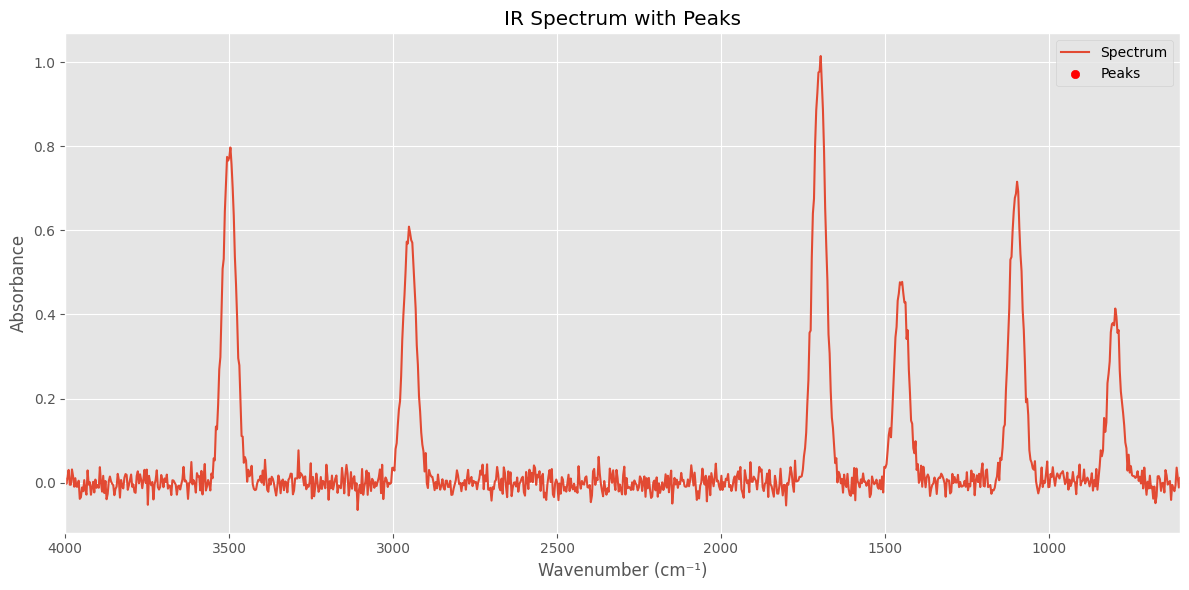


Detected peaks (wavenumber, absorbance):


In [ ]:
# Create an enhanced spectrum using our test data
enhanced_spectrum = EnhancedIRSpectrum(wavenumbers, absorbances)
enhanced_spectrum.add_metadata('temperature', 25)
enhanced_spectrum.add_metadata('sample', 'Synthetic Test')

# Find and plot peaks
peaks = enhanced_spectrum.plot_with_peaks(threshold=0.1, min_distance=50)

# Print the detected peaks
print("\nDetected peaks (wavenumber, absorbance):")
for wn, abs in peaks:
    print(f"{wn:.1f} cm⁻¹: {abs:.3f}")

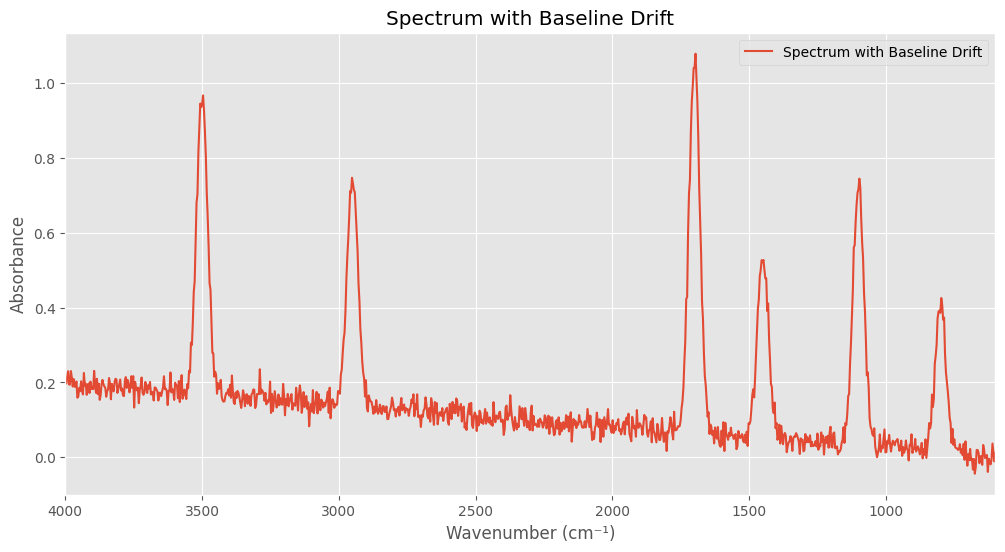

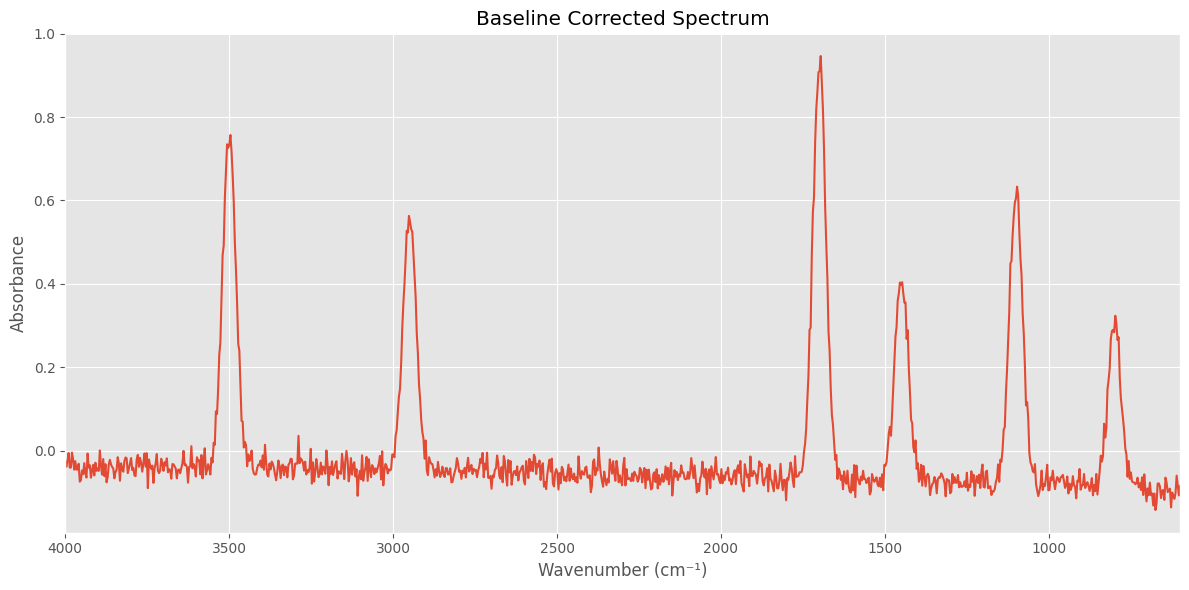

In [ ]:
# Create a baseline drift in our test spectrum for demonstration
drift = np.linspace(0.2, 0, len(wavenumbers))  # Decreasing baseline
drifted_absorbances = absorbances + drift

# Create a spectrum with baseline drift
drifted_spectrum = EnhancedIRSpectrum(wavenumbers, drifted_absorbances)
drifted_spectrum.add_metadata('sample', 'Synthetic Test with Drift')

# Plot the original spectrum
plt.figure(figsize=(12, 6))
plt.plot(wavenumbers, drifted_absorbances, label='Spectrum with Baseline Drift')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Absorbance')
plt.title('Spectrum with Baseline Drift')
plt.xlim(max(wavenumbers), min(wavenumbers))  # Reverse x-axis
plt.grid(True)
plt.legend()
plt.show()

# Perform baseline correction
corrected_spectrum = drifted_spectrum.correct_baseline(polynomial_order=2)

# Plot the corrected spectrum
corrected_spectrum.plot(title='Baseline Corrected Spectrum')

## 7. Creating a Collection of Spectra

We often need to analyze multiple spectra together, such as spectra collected at different temperatures or reaction times. Let's create a class to manage a collection of spectra.

In [ ]:
class SpectrumCollection:
    """A class to manage a collection of IR spectra."""
    
    def __init__(self, name="Spectrum Collection"):
        """Initialize the SpectrumCollection.
        
        Args:
            name (str): A name for this collection
        """
        self.name = name
        self.spectra = []  # List to hold the spectra
        self.metadata = {}  # Metadata for the collection
    
    def add_spectrum(self, spectrum):
        """Add a spectrum to the collection.
        
        Args:
            spectrum (IRSpectrum): The spectrum to add
        """
        if not isinstance(spectrum, IRSpectrum):
            raise TypeError("Can only add IRSpectrum objects to the collection")
        
        self.spectra.append(spectrum)
    
    def load_from_directory(self, directory, pattern="*.dx"):
        """Load all spectra from a directory that match a pattern.
        
        Args:
            directory (str): Directory to search
            pattern (str): Glob pattern to match files
            
        Returns:
            int: Number of spectra successfully loaded
        """
        files = sorted(glob(os.path.join(directory, pattern)))
        loaded_count = 0
        
        for file in files:
            try:
                # Use the enhanced class if possible
                if 'EnhancedIRSpectrum' in globals():
                    spectrum = EnhancedIRSpectrum(filepath=file)
                else:
                    spectrum = IRSpectrum(filepath=file)
                
                self.add_spectrum(spectrum)
                loaded_count += 1
                
            except Exception as e:
                print(f"Error loading {file}: {e}")
        
        return loaded_count
    
    def get_spectrum_by_index(self, index):
        """Get a spectrum by its index in the collection.
        
        Args:
            index (int): The index of the spectrum
            
        Returns:
            IRSpectrum: The requested spectrum
        """
        if index < 0 or index >= len(self.spectra):
            raise IndexError("Index out of range")
        
        return self.spectra[index]
    
    def get_spectrum_by_metadata(self, key, value):
        """Find spectra by a metadata key-value pair.
        
        Args:
            key (str): The metadata key to search for
            value: The value to match
            
        Returns:
            list: Matching spectra
        """
        return [s for s in self.spectra if s.metadata.get(key) == value]
    
    def plot_all(self, xlim=None, ylim=None, colormap='viridis', alpha=0.7):
        """Plot all spectra in the collection.
        
        Args:
            xlim (tuple, optional): The x-axis limits (min, max)
            ylim (tuple, optional): The y-axis limits (min, max)
            colormap (str): The colormap to use
            alpha (float): Transparency for the spectra
        """
        if not self.spectra:
            print("No spectra to plot")
            return
        
        plt.figure(figsize=(12, 8))
        
        # Get colormap
        cmap = plt.get_cmap(colormap)
        colors = [cmap(i/max(1, len(self.spectra)-1)) for i in range(len(self.spectra))]
        
        # Plot each spectrum
        for i, spectrum in enumerate(self.spectra):
            label = f"Spectrum {i}"
            if 'filename' in spectrum.metadata:
                label = os.path.basename(spectrum.metadata['filename'])
            elif 'temperature' in spectrum.metadata:
                label = f"{spectrum.metadata['temperature']}"
            
            plt.plot(spectrum.wavenumbers, spectrum.absorbances, 
                    color=colors[i], alpha=alpha, label=label)
        
        # Set plot parameters
        plt.title(f"{self.name} ({len(self.spectra)} spectra)")
        plt.xlabel('Wavenumber (cm⁻¹)')
        plt.ylabel('Absorbance')
        
        # Handle many spectra by putting legend outside
        if len(self.spectra) > 10:
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        else:
            plt.legend()
        
        # Set axis limits
        if xlim:
            plt.xlim(xlim)
        else:
            # Find the common range across all spectra
            min_wn = min([min(s.wavenumbers) for s in self.spectra])
            max_wn = max([max(s.wavenumbers) for s in self.spectra])
            plt.xlim(max_wn, min_wn)  # Reverse for IR convention
        
        if ylim:
            plt.ylim(ylim)
        
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    
    def plot_waterfall(self, xlim=None, ylim=None, offset=0.2, colormap='viridis'):
        """Create a waterfall plot of all spectra.
        
        Args:
            xlim (tuple, optional): The x-axis limits (min, max)
            ylim (tuple, optional): The y-axis limits (min, max)
            offset (float): Vertical offset between spectra
            colormap (str): The colormap to use
        """
        if not self.spectra:
            print("No spectra to plot")
            return
        
        plt.figure(figsize=(12, 8))
        
        # Get colormap
        cmap = plt.get_cmap(colormap)
        colors = [cmap(i/max(1, len(self.spectra)-1)) for i in range(len(self.spectra))]
        
        # Plot each spectrum with offset
        for i, spectrum in enumerate(self.spectra):
            # Apply offset
            offset_abs = spectrum.absorbances + (i * offset)
            
            # Create label
            label = f"Spectrum {i}"
            if 'filename' in spectrum.metadata:
                label = os.path.basename(spectrum.metadata['filename'])
            elif 'temperature' in spectrum.metadata:
                label = f"{spectrum.metadata['temperature']}"
            
            plt.plot(spectrum.wavenumbers, offset_abs, 
                    color=colors[i], label=label)
        
        # Set plot parameters
        plt.title(f"Waterfall Plot: {self.name} ({len(self.spectra)} spectra)")
        plt.xlabel('Wavenumber (cm⁻¹)')
        plt.ylabel('Absorbance (with offset)')
        
        # Handle many spectra by putting legend outside
        if len(self.spectra) > 10:
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        else:
            plt.legend()
        
        # Set axis limits
        if xlim:
            plt.xlim(xlim)
        else:
            # Find the common range across all spectra
            min_wn = min([min(s.wavenumbers) for s in self.spectra])
            max_wn = max([max(s.wavenumbers) for s in self.spectra])
            plt.xlim(max_wn, min_wn)  # Reverse for IR convention
        
        # Set y limits to show all spectra
        if not ylim and self.spectra:
            max_abs = max([max(s.absorbances) for s in self.spectra])
            min_abs = min([min(s.absorbances) for s in self.spectra])
            plt.ylim(min_abs - 0.1, max_abs + offset * len(self.spectra))
        
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        
    def plot_peak_vs_property(self, wavenumber, property_key, tolerance=10):
        """Plot the intensity of a peak against a property from metadata.
        
        Args:
            wavenumber (float): The wavenumber position of the peak
            property_key (str): The metadata key to use for the x-axis
            tolerance (float): Tolerance for finding the wavenumber
        """
        if not self.spectra:
            print("No spectra to analyze")
            return
        
        # Check if all spectra have the requested metadata
        valid_spectra = [s for s in self.spectra if property_key in s.metadata]
        if not valid_spectra:
            print(f"No spectra have the metadata key: {property_key}")
            return
        
        # Extract the property and peak intensity values
        property_values = []
        peak_intensities = []
        
        for spectrum in valid_spectra:
            try:
                # Try to convert the property to a number (for plotting)
                prop_val = spectrum.metadata[property_key]
                if isinstance(prop_val, str):
                    # Try to extract a number from strings like "25 °C"
                    import re
                    match = re.search(r'\d+(\.\d+)?', prop_val)
                    if match:
                        prop_val = float(match.group())
                    
                # Only include if we can convert to a number
                if isinstance(prop_val, (int, float)):
                    # Get the peak intensity
                    intensity = spectrum.get_peak_intensity(wavenumber, tolerance)
                    
                    property_values.append(prop_val)
                    peak_intensities.append(intensity)
                    
            except (ValueError, AttributeError) as e:
                print(f"Error processing spectrum: {e}")
        
        if not property_values:
            print(f"No valid numerical data for property: {property_key}")
            return
        
        # Sort by property value
        sorted_data = sorted(zip(property_values, peak_intensities))
        sorted_props, sorted_intensities = zip(*sorted_data)
        
        # Create the plot
        plt.figure(figsize=(10, 6))
        plt.plot(sorted_props, sorted_intensities, 'o-', linewidth=2, markersize=8)
        plt.xlabel(property_key)
        plt.ylabel(f'Absorbance at {wavenumber} cm⁻¹')
        plt.title(f'Peak Intensity vs {property_key}')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

## 8. Working with a Collection of Temperature-Dependent Spectra

Let's create a collection of spectra with different temperatures and see how a specific IR band changes with temperature.

### Own spectra

In [ ]:
# Separate metadata and spectra columns
metadata_columns = [col for col in merged_data.columns if col not in spectra_DF.columns]
spectra_columns = [col for col in merged_data.columns if col in spectra_DF.columns]

# Create DataFrames for metadata and spectra
merged_data_metadata = merged_data[metadata_columns].copy()
merged_data_spectra = merged_data[spectra_columns].copy()

merged_data_metadata

,CO_sp,CO_flow,H2_sp,H2_flow,He_low_sp,He_low_flow,NO_sp,NO_flow,Propene_sp,Propene_flow,O2_sp,O2_flow,Target_Oven_sp,Oven_ramp,Oven_temp,Oven_temp_internal,Oven_percent,Oven_actual_sp
DateTime,,,,,,,,,,,,,,,,,,
2025-04-29 09:58:30,0.0,0.0,0.0,0.0,0.0,0.039,0.0,0.0,0.0,-0.003,0.0,0.154,15.0,10.0,23.2,0.0,0.0,15.0
2025-04-29 09:59:30,0.0,0.0,0.0,0.0,0.0,0.035,0.0,0.0,0.0,-0.014,0.0,0.181,400.0,10.0,23.2,0.0,1.2,24.5
2025-04-29 10:00:30,0.0,0.0,0.0,0.0,0.0,0.037,0.0,0.0,0.0,-0.019,0.0,0.170,400.0,10.0,28.0,0.0,21.9,34.5
2025-04-29 10:01:30,0.0,0.0,0.0,0.0,0.0,0.039,0.0,0.0,0.0,-0.021,0.0,0.161,400.0,10.0,43.3,0.0,20.9,44.5
2025-04-29 10:02:30,0.0,0.0,0.0,0.0,0.0,0.032,0.0,0.0,0.0,-0.007,0.0,0.162,400.0,10.0,52.9,0.0,23.2,54.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-29 20:11:30,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,-0.005,0.0,0.258,15.0,2.0,25.6,0.0,0.0,15.0
2025-04-29 20:12:30,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,-0.010,0.0,0.252,15.0,2.0,25.6,0.0,0.0,15.0
2025-04-29 20:13:30,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,-0.008,0.0,0.250,15.0,2.0,25.5,0.0,0.0,15.0


In [ ]:
spectra_collection = SpectrumCollection(name="IR Spectra Collection")

for n in merged_data_spectra:
    spectra_collection.add_spectrum(n)

TypeError: Can only add IRSpectrum objects to the collection

C:\Users\6193536\AppData\Local\Temp\ipykernel_24940\274805011.py:134: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


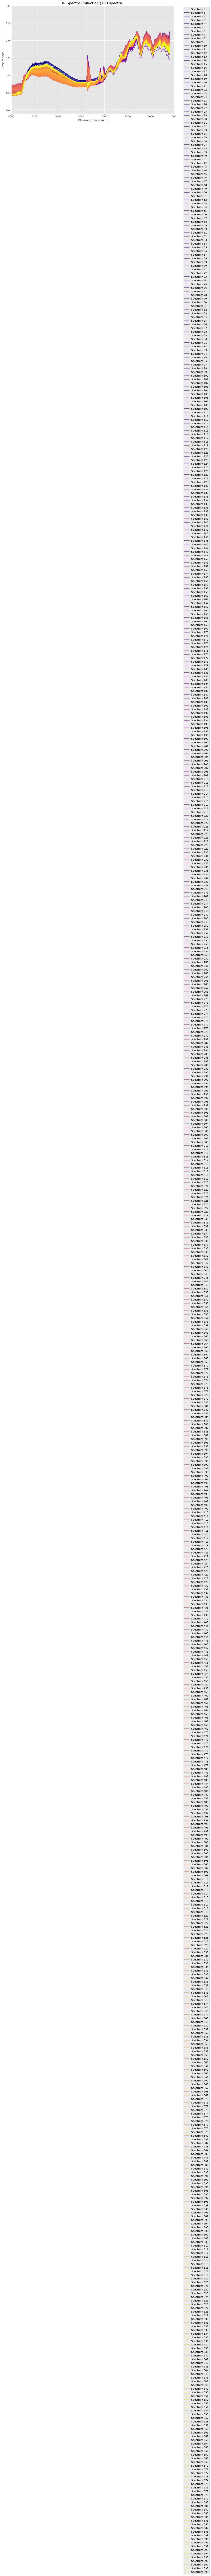

In [ ]:
spectra_collection.plot_all(xlim=(4000, 500), ylim=(-0.1, 3), colormap='plasma', alpha=0.7)

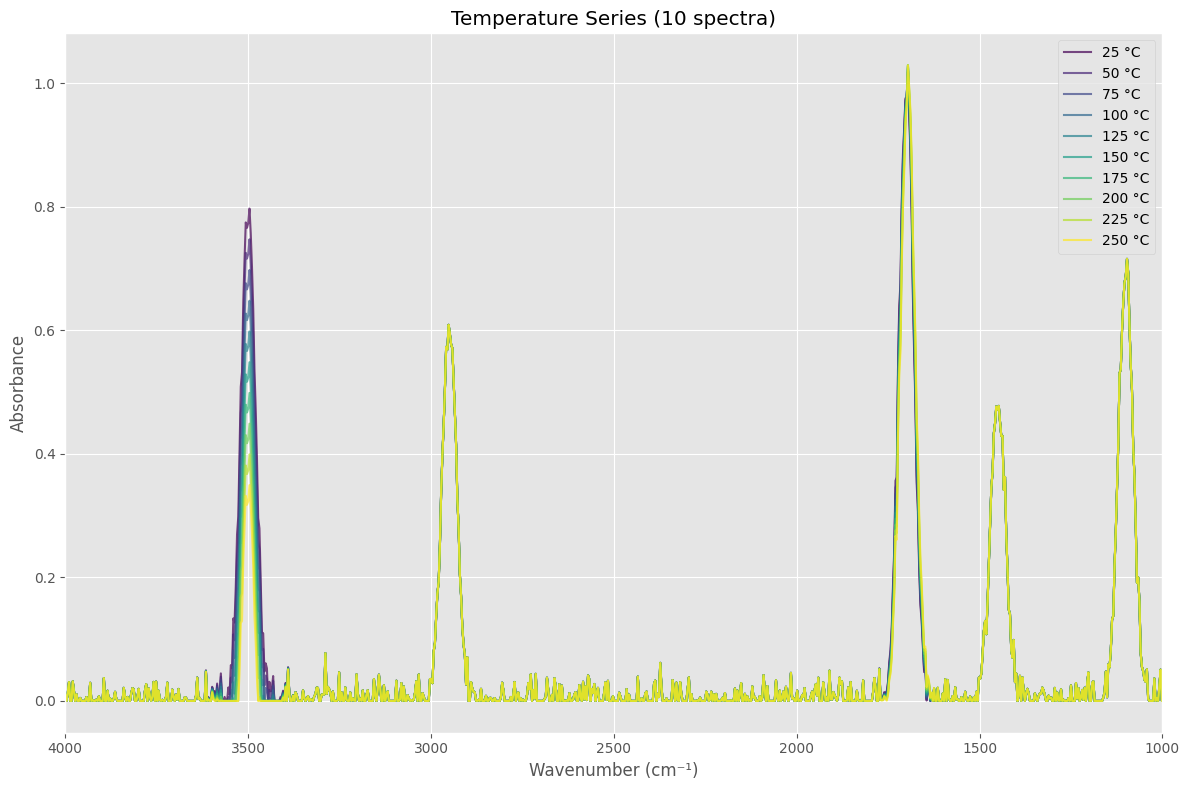

In [ ]:
# Create a collection of temperature-dependent spectra
temp_collection = SpectrumCollection("Temperature Series")

# Create spectra at different temperatures
temperatures = range(25, 275, 25)  # 25°C to 250°C in steps of 25°C

for temp in temperatures:
    # Start with our base spectrum
    temp_absorbances = absorbances.copy()
    
    # Simulate temperature effects on the spectrum
    # 1. The 3500 cm-1 band (O-H) decreases with temperature
    oh_index = np.abs(wavenumbers - 3500).argmin()
    region = np.exp(-((wavenumbers - 3500) / 50) ** 2)  # Define the band region
    temp_absorbances -= region * (temp - 25) / 250 * 0.5  # Decrease with temperature
    
    # 2. The 1700 cm-1 band (C=O) shifts slightly with temperature
    co_shift = 5 * (temp - 25) / 225  # Maximum shift of 5 cm-1
    co_band = np.exp(-((wavenumbers - (1700 - co_shift)) / 30) ** 2) * 0.8
    temp_absorbances += co_band - np.exp(-((wavenumbers - 1700) / 30) ** 2) * 0.8
    
    # Ensure no negative absorbances
    temp_absorbances = np.maximum(temp_absorbances, 0)
    
    # Create the spectrum and add metadata
    temp_spectrum = EnhancedIRSpectrum(wavenumbers, temp_absorbances)
    temp_spectrum.add_metadata('temperature', f"{temp} °C")
    temp_spectrum.add_metadata('temperature_value', temp)  # Numerical value for plotting
    temp_spectrum.add_metadata('sample', 'Synthetic Temperature Series')
    
    # Add to collection
    temp_collection.add_spectrum(temp_spectrum)

# Plot all spectra in the collection
temp_collection.plot_all(xlim=(4000, 1000))

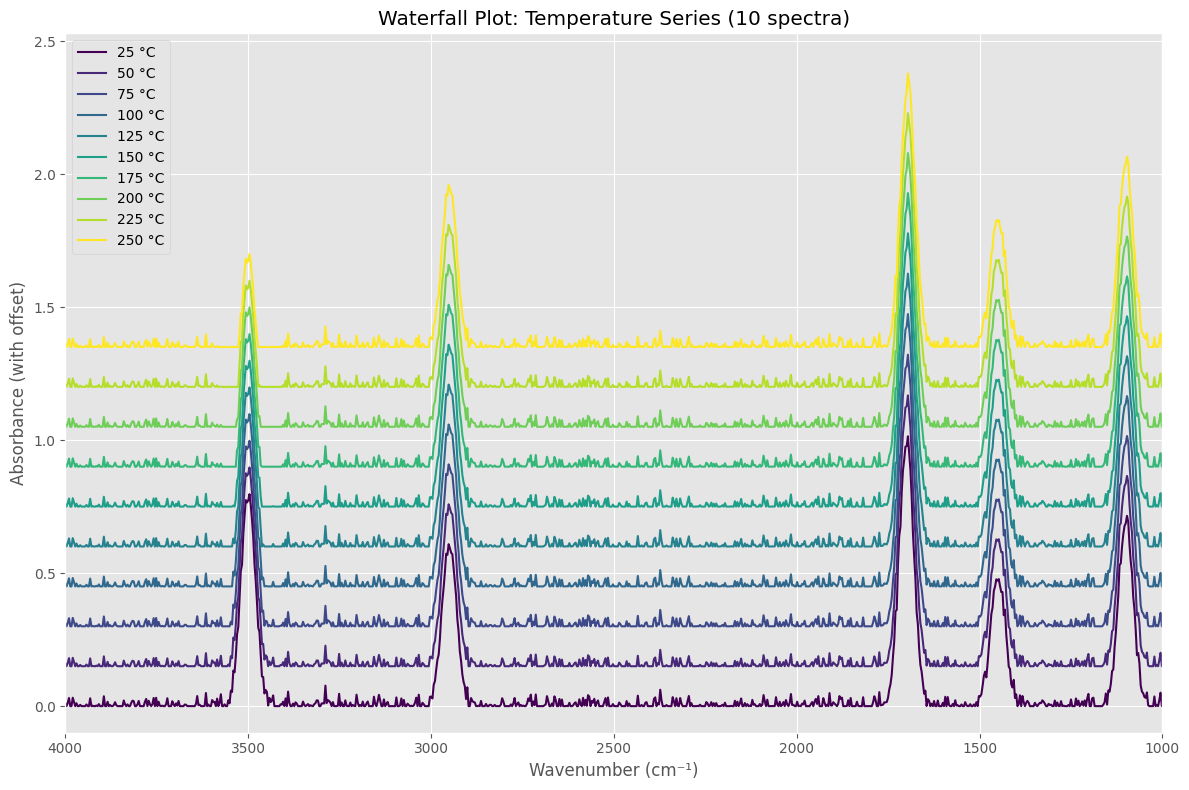

In [ ]:
# Create a waterfall plot to better see the changes
temp_collection.plot_waterfall(xlim=(4000, 1000), offset=0.15)

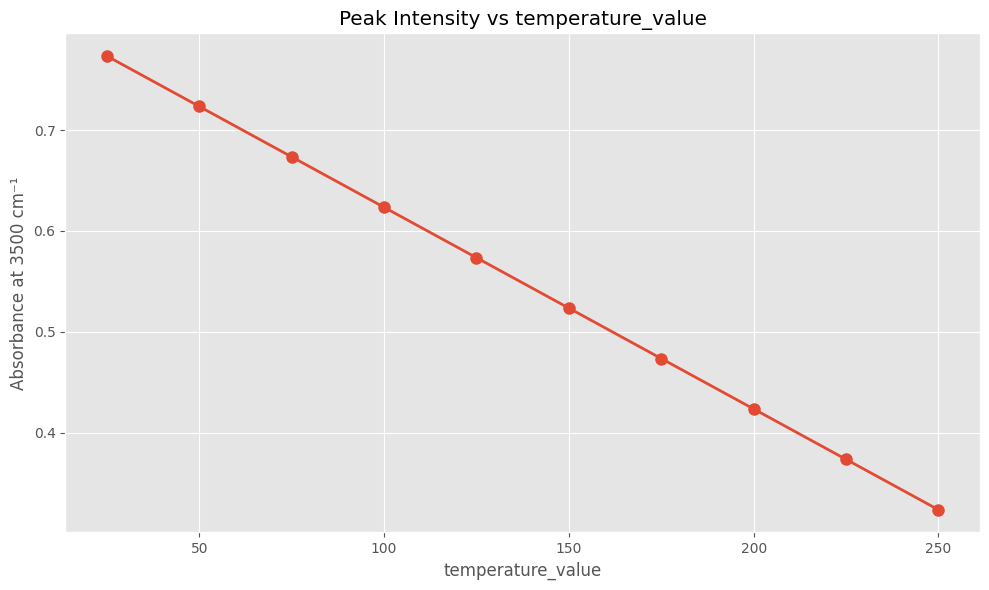

In [ ]:
# Plot how the O-H peak intensity changes with temperature
temp_collection.plot_peak_vs_property(3500, 'temperature_value')

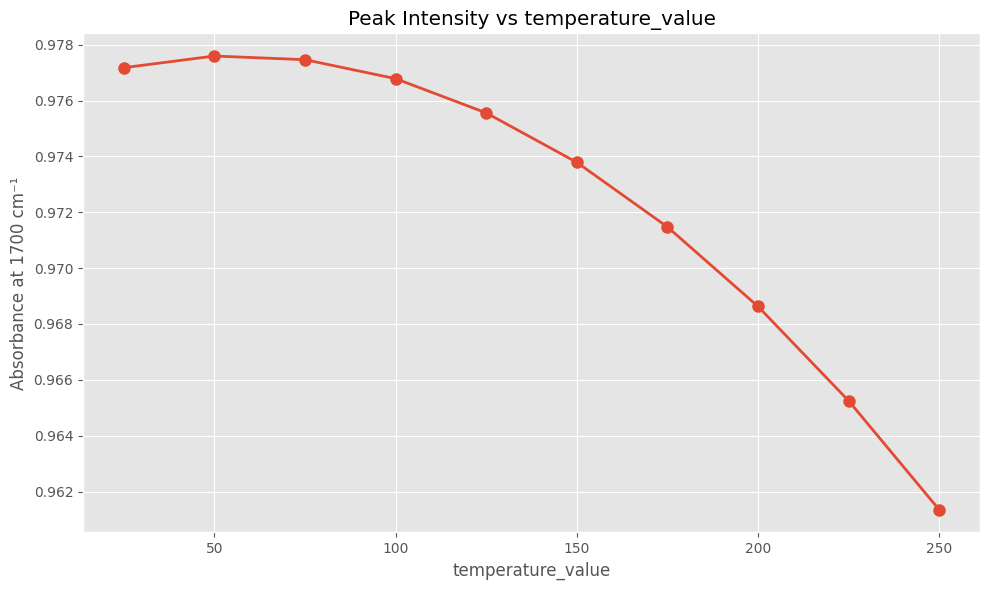

In [ ]:
# Plot how the C=O peak intensity changes with temperature
temp_collection.plot_peak_vs_property(1700, 'temperature_value', tolerance=15)

## 9. Exercise: Create a Custom Analysis Function

As an exercise, extend the `EnhancedIRSpectrum` class with a new method to calculate the area under a specific peak. This is useful for quantitative analysis.

In [ ]:
# Solution to the exercise
def calculate_peak_area(self, start_wavenumber, end_wavenumber, baseline_correction=True):
    """Calculate the area under a peak between two wavenumbers.
    
    Args:
        start_wavenumber (float): The starting wavenumber
        end_wavenumber (float): The ending wavenumber
        baseline_correction (bool): Whether to perform linear baseline correction
        
    Returns:
        float: The area under the peak
    """
    # Ensure start is less than end
    if start_wavenumber > end_wavenumber:
        start_wavenumber, end_wavenumber = end_wavenumber, start_wavenumber
    
    # Find indices of the region
    start_idx = np.abs(self.wavenumbers - start_wavenumber).argmin()
    end_idx = np.abs(self.wavenumbers - end_wavenumber).argmin()
    
    # Extract the region
    region_wavenumbers = self.wavenumbers[start_idx:end_idx+1]
    region_absorbances = self.absorbances[start_idx:end_idx+1]
    
    # Apply baseline correction if requested
    if baseline_correction:
        # Create a straight line between the endpoints as baseline
        baseline = np.linspace(region_absorbances[0], region_absorbances[-1], len(region_absorbances))
        region_absorbances = region_absorbances - baseline
    
    # Calculate the area using the trapezoidal rule
    area = np.trapz(region_absorbances, region_wavenumbers)
    
    # The sign might be negative due to the reversed wavenumber axis in IR
    return abs(area)

# Add this method to our EnhancedIRSpectrum class
EnhancedIRSpectrum.calculate_peak_area = calculate_peak_area

# Test the new method
# Get one of our temperature spectra
test_spectrum = temp_collection.spectra[0]
area = test_spectrum.calculate_peak_area(3400, 3600)
print(f"Area under the O-H peak (3400-3600 cm⁻¹): {area:.4f}")

# Calculate areas for all spectra in the temperature series
temperatures = []
oh_areas = []

for spectrum in temp_collection.spectra:
    temp = spectrum.metadata.get('temperature_value')
    area = spectrum.calculate_peak_area(3400, 3600)
    
    temperatures.append(temp)
    oh_areas.append(area)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(temperatures, oh_areas, 'o-', linewidth=2, markersize=8)
plt.xlabel('Temperature (°C)')
plt.ylabel('O-H Peak Area (3400-3600 cm⁻¹)')
plt.title('O-H Peak Area vs Temperature')
plt.grid(True)
plt.tight_layout()
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

## 10. Summary and Conclusion

In this tutorial, we've learned how to apply object-oriented programming to IR spectroscopy analysis. We've covered:

1. Creating a basic `IRSpectrum` class to represent spectral data
2. Adding metadata to spectra for experimental conditions
3. Enhancing our class with analysis methods like background subtraction and peak finding
4. Managing collections of spectra (e.g., temperature series)
5. Creating visualization methods for spectral data
6. Tracking how peak properties change with experimental conditions

### Benefits of OOP for Scientific Data Analysis

- **Organization**: Keep data and related functionality together
- **Reusability**: Create libraries of analysis methods
- **Abstraction**: Hide complex implementation details
- **Extension**: Easily add new functionality to existing classes
- **Reproducibility**: Standardized methods for data processing

### Next Steps

You can extend this framework to:
- Implement more advanced spectral analysis techniques
- Create specialized classes for different types of experiments
- Build a complete library for your research group's specific needs
- Integrate with other data analysis tools and workflows

The object-oriented approach provides a solid foundation for building complex scientific data analysis pipelines while keeping your code organized and maintainable.